In [1]:
# coding: utf-8
###========================================================###
###========================================================###
###         IDENTITY-BASED LINKABLE RING SIGNATURE         ###
###========================================================###
###========================================================###

from timeit import default_timer as timer
import sys
import random
import time
import hashlib
import statistics
import os
import matplotlib.pyplot as plt 

In [2]:
def gauss_function_number(x, c, s):
    """
    * Input:
        - x: a variable
        - c: a center
        - s: a Gaussian paramter
    * Output:
        - exp(-pi*(x-c)^2/s^2)
    """
    #If x,c are real numbers
   
    return exp(-pi*(x-c)^2/s^2)
   

s=RR.random_element(1,10)

x=random_vector(ZZ,3)
c=random_vector(ZZ,3)
#x=randint(0,10)
#c=randint(0,10)

#=================
def gauss_function_vector(xx, cc, s):
    """
    * Input
        - a variable x
        - a center c
        - a Gaussian paramter s
    * Output:
        - exp(-pi*(x-c)^2/s^2)
    """
    #If x,c are real numbers
    return exp(-pi*(xx-cc).norm()^2/s^2)


#=======================================================
# A TEST CASE

s=RR.random_element(1,10)

xx=random_vector(ZZ,3)
cc=random_vector(ZZ,3)
x=randint(0,10)
c=randint(0,10)

print(RR(gauss_function_number(x,c, s)))

print(RR(gauss_function_vector(xx,cc, s)))


0.788903079665276
0.0253435003134754


In [3]:
from sage.stats.distributions.discrete_gaussian_integer import DiscreteGaussianDistributionIntegerSampler
def sample_z(s,c):
    """
    Sample from D_{ZZ,s,c} defined by \rho_s,c(x):=exp(-(x-c)^2/(2s^2))
    s: Gaussian parameter
    c: center
    Input:
    
    Output:
    
    See at https://doc.sagemath.org/html/en/reference/stats/sage/stats/distributions/discrete_gaussian_integer.html
    """
    D=DiscreteGaussianDistributionIntegerSampler(s, c)
    return D()

#=======================================================
# A TEST CASE
sample_z(2,0)
#histogram([sample_z(2,0) for _ in range(200)])

2

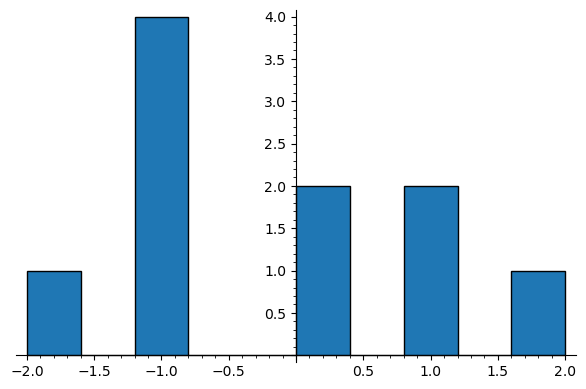

In [4]:
def sample_z_gpv08(s,c,n=3):
    """
    Sample from D_{ZZ,s,c} defined by rho_s,c(x):=exp(-(x-c)^2/(2s^2))
    * Input:
        - s: Gaussian parameter
        - c: center
        - n: security parameter. However, we can see it as the dimension 
           (when you want to use sample_z_gpv08 in sample_d_gpv08 to sample 
           lattice vectors of an n-dimensional lattice)
    * Output:
        - An integer x ~ D_{ZZ,s,c} defined by rho_s,c(x):=exp(-(x-c)^2/(2s^2))
    See at https://doc.sagemath.org/html/en/reference/stats/sage/stats/
        distributions/discrete_gaussian_integer.html
    """
    t=log(n,2)
    x=randint(c-s*t,c+s*t)
    #u=RR.random_element(0,1)
    u=uniform(0, 1)
    while gauss_function_number(x,c,s)<=u:
        x=randint(c-s*t,c+s*t)
        u=uniform(0, 1)
    return x

#=======================================================
# A TEST CASE
s=2
c=0
n=1024
histogram([sample_z_gpv08(s,c,n) for _ in range(10)])

In [5]:
def coeff_x(xx,yy):
    """
    * Compute <xx,yy>/||yy||^2
    * Input:
        - xx, yy: two vectors of same length
    * Output:
        - <xx,yy>/||yy||^2        
    """
    return (xx.dot_product(yy))/(yy.dot_product(yy))


In [6]:
def sample_d_gpv08(AA, s, cc):
    """
    * Sample a lattice vector of lattice L(AA)  (SampleD in [GPV08, Section 4.2])
    * Input:
        - cc: center vector
        -  s: Gaussian parameter
        - AA: basis of a lattice
    * Output:  lattice_vector: a vector of lattice L(AA) 
    """    
    
    vv=copy(cc)
    BB=AA.gram_schmidt()[0]
    m=BB.nrows()
    n=BB.ncols()
    lattice_vector=zero_vector(ZZ, n)           # closest_vector:=zero_vector
    i=m
    while i>0:
        i=i-1
        c_i_dash=coeff_x(cc,BB[i])
        s_i_dash=s/(BB[i].norm())
        z_i=sample_z(s_i_dash,c_i_dash)
        cc=cc-z_i*AA[i]
        lattice_vector=lattice_vector + z_i*AA[i]
    return lattice_vector

#=============================================================
# A TEST CASE
AA=random_matrix(ZZ, 3, 3)
s=randint(1,8)
cc=random_vector(ZZ,3)
print("AA=")
print(AA)
print("s=",s)
print("cc=",cc)
sample_d_gpv08(AA, s, cc)
#histogram([sample_d_gpv08(AA,s,cc) for _ in range(200)])

AA=
[-1 -3  9]
[ 1  2 -3]
[ 8 -1 -1]
s= 1
cc= (7, 24, -1)


(8, 26, -5)

AA=
[-1 -3  9]
[ 1  2 -3]
[ 8 -1 -1]
s= 1
cc= (7, 24, -1)


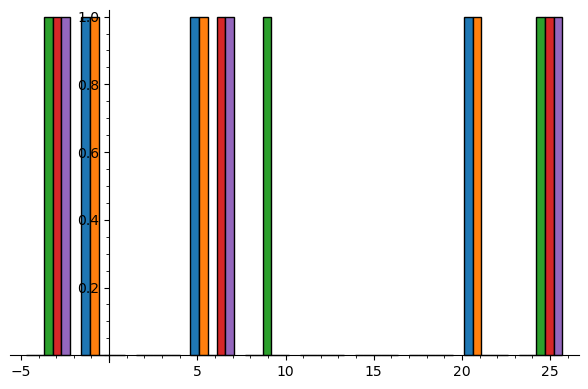

In [7]:
from sage.stats.distributions.discrete_gaussian_lattice import DiscreteGaussianDistributionLatticeSampler

def sample_d(BB,s,cc):
    """
    This algorithm is to sample a lattice vector from D_{L(BB),s,cc}, defined by \rho_s,c(x):=exp(-||x-c||^2/(2s^2))
    * Input:
        - BB: a basis for the lattice L(BB) (BB can be input as ZZ^m)
        - s: Gaussian parameter
        - cc: center vector
    * Output:
        - A lattice vector sampled from discrete Gaussian D_{L(BB),s,cc}
     See at https://doc.sagemath.org/html/en/reference/stats/sage/stats/
     distributions/discrete_gaussian_lattice.html

    """
    
    D=DiscreteGaussianDistributionLatticeSampler(BB, s, cc)
    return D()


#==========================================================
# A TEST CASE
print("AA=")
print(AA)
print("s=",s)
print("cc=",cc)
#sampleD(ZZ^3,s, cc)
#DiscreteGaussianDistributionLatticeSampler(BB, sigma, cc)

#sample_d(BB,sigma,cc)
histogram([sample_d(AA,s,cc) for _ in range(5)])

In [8]:
# This algorithm is to generate the gadget vector gg=(1 2 4 8....2^{k-1}) via [MP12]
def gadget_vector(k):
    """
    This algorithm is to generate the gadget vector gg=(1 2 4 8....2^{k-1}) via [MP12]
    * Input: 
        - k: dimension of the output vector gg
    * Output:  
        - gg=(1 2 4 8....2^{k-1}).
    """
    return vector([2**i for i in range(k)])


In [9]:

def gadget_matrix(n, q):
    """
    This algorithm is to generate the gadget matrix GG via [MP12]

                             |gg  0   0  ...   0 |
                             |0   gg  0  ...   0 |
          Gadget matrix GG=  |0   0   gg ...   0 |    
                             |...................|
                             |0   0    0 ...   gg|
                
    Input: 
        - n: number of rows of GG
        - q: modulus
    
    Output:                 
        - The gadget matrix GG.
    """
  
 
    k=ceil(log(q,2))
    m=n*k
    ZZq = IntegerModRing(q)
    #vector gg=[1 2 4 8....2^{k-1}] 
    gg=gadget_vector(k)
    #print("gg=",gg)
    
    # Initialize GG as a zero matrix in ZZ^{n x m}
    GG=zero_matrix(ZZ,n, m)
    #print("GG=")
    #print(GG)
    
    # For each row i, we change elements at i*k+j for j in [0,..,k-1] by gg[j]
    for i in range(n):
        for j in range(k):
            GG[i,i*k+j]=gg[j]
    #print("GG=")
    #print(GG)
    # Change ring of GG into ZZ_q
    GG.change_ring(ZZq)
    
    return GG

#======================================
# A TEST CASE
GG=gadget_matrix(3, 17)
print("GG=")
print(GG)

GG=
[ 1  2  4  8 16  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  2  4  8 16  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  1  2  4  8 16]


In [10]:
def random_invertible_matrix(modulus=1, size=3):
    """
    Input:
    - modulus: modulus of the base ring, such as modulus=5 then we consider the ring ZZ_5.
      By default, if modulus=1, we are working in ZZ
    - size: default value is 3
    Output: A matrix that is invertible in ZZ_q, with q=modulus
    """
    # By default, if modulus=1, we are working in ZZ
    if modulus==1:
        V = ZZ**size
        vectors = []
        for i in range(size):
            vv = V.random_element()
            while vv in V.span(vectors):
                vv = V.random_element()
            vectors.append(vv)
    # If modulus q>=2, we are working in ZZ_q        
    if modulus >=2:
        ZZq = IntegerModRing(modulus)
        V = ZZq**size
        vectors = []
        for i in range(size):
            vv = V.random_element()
            while vv in V.span(vectors):
                vv = V.random_element()
            vectors.append(vv)
    return(Matrix(vectors))

#======================================================
# A TEST CASE 
AA=random_invertible_matrix(5, 4)
print("AA=")
print(AA)
print("AA is invertible?===> Answer:", AA.is_invertible())

AA=
[1 0 1 3]
[1 3 2 1]
[4 3 4 0]
[4 0 0 4]
AA is invertible?===> Answer: True


In [11]:
def perpendicular_q_ary_basis(AA, q):
    """
    *Input:
        - AA: A (n x m)-matrix in ZZq
        - q: a modulus
    *Output: 
        - A basis CC for the q-ary lattice Lambda_q^{perp}(AA) generated by the matrix AA in modulo q, 
        i.e., the lattice L(AA)={x^m in ZZ^m: xx.AA=0 mod q}
        
    """
    # number of rows in AA
    n=AA.nrows()
    m=AA.ncols()
    
    #print("m=",m)
    #print("n=",n)
    
    #Compute “left kernel” (or left_nullspace, i.e. the space of vectors ww such that ww.AA=0
    #left_kernel_of_AA=kernel(AA.transpose()) #or 
    #left_kernel_of_AA=kernel(AA.transpose()) 
    # Note that, we have to perform on input AA.transpose() instead of AA
    WW=Matrix(kernel(AA.transpose()) .basis()).change_ring(ZZ)
    #print("WW=")
    #print(WW)
    
    # Generate matrix q*IIn where IIn is the identity matrix of dimension n
    qIIn=q*identity_matrix(ZZ,n) 
    #print("q_IIn=")
    #print(q_IIn)
    
    # Generate (n x (m-n))-zero matrix KK
    KK=zero_matrix(ZZ,n, m-n)
    #print("KK=")
    #print(KK)
    
    # Concatenate KK with qIIn
    BB=KK.augment(qIIn, subdivide=True).change_ring(ZZ)
    #print("BB=")
   # print(BB)
    
    # The basis is:
    CC=WW.stack(BB, subdivide=True)  
    #print("CC=")
    #print(CC)
    
    return CC


#=======================================================
# A TEST CASE
q=13
n=4
m=10

ZZq=IntegerModRing(q)
AA=random_matrix(ZZq, n, m)
#AA_hnf=AA.echelon_form()
#print("AA_hnf=")
#print(AA_hnf)
    
print("AA=")
print(AA)
perpendicular_q_ary_basis(AA, q)


AA=
[ 2  2  7  4 11  7  6  8  7  1]
[12  0 11 10  4  2 11 10  2 12]
[ 9  1  2  9  7  5 11  6  8  4]
[12 11  8  5  7 11  6  6 11  0]


[ 1  0  0  0  0  0  8  8  2  2]
[ 0  1  0  0  0  0  6  7 12  4]
[ 0  0  1  0  0  0  7  9  0  9]
[ 0  0  0  1  0  0 10  4 12  2]
[ 0  0  0  0  1  0  2  9  4  7]
[ 0  0  0  0  0  1  1 10  6  8]
[-----------------------------]
[ 0  0  0  0  0  0 13  0  0  0]
[ 0  0  0  0  0  0  0 13  0  0]
[ 0  0  0  0  0  0  0  0 13  0]
[ 0  0  0  0  0  0  0  0  0 13]

In [12]:
def smoothing_parameter_of_ZZ(epsilon):
    """
    This algorithm computes the smoothing parameter eta_epsilon(ZZ).
    * Input:
        - epsilon: a very small positive real number. E.g., we can set epsilon=2^(-71) or epsilon=2^(-84)
    * Output:
        - smoothing parameter eta_epsilon(ZZ), which is denoted by smt_para
    
    """
    smt_para=RR(sqrt(ln(2/epsilon)/pi))
    #print("smt_para=", smt_para)
    return smt_para


#======================================================
# A TEST CASE
epsilon=2^(-84)
smoothing_parameter_of_ZZ(epsilon)


4.33059187790484

In [13]:
def smoothing_parameter_q_ary_lattice(AA, q, epsilon):
    """
    This algorithm computes the smoothing parameter eta_epsilon(Lambda_q^{perp}(AA)) for the q-ary lattice Lambda_q^{perp}(AA).
    * Input:
        - AA; a matrix w.r.t the q-ary lattice Lambda_q^{perp}(AA)
        - q: modulus 
        - epsilon: a very small positive real number. E.g., we can set epsilon=2^(-71) or epsilon=2^(-84)
    * Output:
        - smoothing parameter eta_epsilon(Lambda_q^{perp}(AA)), which is denoted by smt_para
    """
    # Compute the basis for the q-ary lattice Lambda_q^{perp}(AA):
    BB=perpendicular_q_ary_basis(AA, q)
    # Dimension of BB (which is a square matrix)
    n=BB.nrows()
    #print("n=",n)
    
    #Compute Gram Schmidt of BB
    BB_gs=BB.gram_schmidt()[0]
    #print("||BB_gs||=", BB_gs.norm())
    #print("factor=", RR(sqrt(ln(2*n*(1+1/epsilon))/pi)))
    
    # Compute smoothing parameter of Lambda_q^{perp}(AA) using [MP12,Lemma 2.3] (also [GPV08, Theorem 3.1]) 
    smt_para=RR(BB_gs.norm()*sqrt(ln(2*n*(1+1/epsilon))/pi))   
    #print("smt_para=",smt_para)
    return smt_para


#======================================================
# A TEST CASE

q=13
m=4
n=10
epsilon=2^(-80)

ZZq=IntegerModRing(q)

AA=random_matrix(ZZq, m, n)
print("AA=")
print(AA)

smoothing_parameter_q_ary_lattice(AA,q,epsilon)


AA=
[ 5 12  7 12  9  6 12  2  5  1]
[ 6  2  6  4  1  1  4  8  2  6]
[12  3  1 12  9  1  4 11 11  8]
[ 9  2  8  8  3 12  2  5  6  9]


56.4035077377530

In [14]:
#==========================================================
def gen_trap_mp12(n, q, mt, option_HH, epsilon):
    """
    * Input:
        - n: number of rows (security parameter) of AA
        - q: modulus, q should be prime 
        - mt: a positive integer mt>=1
          Then number of columns m=mt+n*k, where k=ceil(log_2(q)), 
        - option_HH: 
                + If option_HH=0 (default) then HH is zero matrix. 
                + If option_HH=1 then HH=II, identity matrix
                + Otherwise, HH is chosen to be invertible in ZZq.   
        - epsilon: epsilon in the smoothing parameter eta_{epsilon}(ZZ) for ZZ.
          We can choose epsilon=2^(-71) or epsilon=2^(-84)
    * Output: 
        - A matrix AA and its trapdoor TT via MP12:
    """
    # Initial
    ZZq = IntegerModRing(q)
    k=ceil(log(q,2))
    w=n*k
    m=mt+w
    #print("mt=", mt)
    #print("nk=", n*k)
    
    #Generate (n x mt)-matrix AAt from ZZq
    AAt = random_matrix(ZZq,n,mt)
    #print("AAt=")
    #print(AAt)
    
    #Generate gadget matrix GG
    GG=gadget_matrix(n, q)
    #print("GG=")
    #print(GG)
    
    #Generate center for Discrete Gaussian
    cc=zero_vector(ZZ,w)
    #print("cc=")
    #print(cc)
    
    
    # Choose Gaussian parameter s for Discrete Gaussian w.r.t. smoothing parameter
    # Here we choose s= smoothing parameter of ZZ (i.e., s=\eta_{epsilon}(ZZ))
    # (See GPV08, at the beginning of Section 2)
    s=smoothing_parameter_of_ZZ(epsilon)
    print("s=", s)
    
    #sigma= ceil(sqrt(n))#sqrt(log(2+2:e,e):pi)
    #print("sigma=",sigma)
    
    #Generate trapdoor via D_{ZZ^w,s,cc}
    TT=Matrix([sample_d(ZZ^w,s,cc) for i in range(mt)])
    #print("TT=")
    #print(TT)
    
    #Generate n-dimensional matrix H that is invertible in ZZ_q
    if option_HH==0:
        HH=zero_matrix(ZZq,n)
    elif option_HH==1:
        HH=identity_matrix(ZZq,n)
    else:
        HH=random_invertible_matrix(q,n)
    #print("HH=")
    #print(HH)
    
    # Change into ZZ
    HHz=HH.change_ring(ZZ)
    GGz=GG.change_ring(ZZ)
    AAtz=AAt.change_ring(ZZ)
    
    # Compute BBz=HHz*GGz-AAtz*TT in ZZ and take modulo q
    BBz=HHz*GGz-AAtz*TT
    #print("BBz=")
    #print(BBz)
    
    BBz=BBz%q
    
    # Change into ZZq
    BB=BBz.change_ring(ZZq)        
    #print("BB=")
    #print(BB)
    
    # Set AA=[AAt|BB]
    AA=AAt.augment(BB, subdivide=True)
    #print("AA=")
    #print(AA)
    
    return (AA, HH, TT, q)


#=======================================================
# A TEST CASE
n=5
q=13
mt=2
option_HH=2
epsilon=2^(-71)
(AA,HH,TT, q)=gen_trap_mp12(n,q,mt,option_HH, epsilon)
print("AA=")
print(AA)
print("HH=")
print(HH)
print("TT=")
print(TT)
#==========================================================  

s= 3.98569482160776
AA=
[11 11|11 11 12  0  0  1  7  1 12  5  3  2 11 11 11 12  8  6  8 10]
[11  1|11  6  0  9  7 12 10 10  4  6  5  7  4  9 10  4  2  7  1  2]
[ 5  4| 6  0  4  5  3 11  5  9  4  0 11 10 12  2 11 10  0 12 11  9]
[ 6  6| 2 11  0  7  7 11  7  1  1  7  9  4  8 10  1  6  9  9  4  0]
[ 4  1| 2  5  6  1  1  3  2  1  6  7  2 11  6  9 11  9 10  1  6  5]
HH=
[ 7  6  8 11  0]
[ 7  5 12 10 10]
[ 3  8 10 10  6]
[ 1  2  0  8  7]
[10 10  2  0 10]
TT=
[  2  -1   1   1   4   1  -4   6  -2   3  -4  -1  -2   1   4   1   3   1  -3  -7]
[  0   6   4  -3  -7   0   2   3   4  -2  -4  -4   2   0  -1   0 -12   2  -6  -1]


In [16]:
def modulo_inverse_matrix(matrix, modulus):
    """
    * Input: 
        - matrix: A matrix e.g. AA
        - modulus: A modulus e.g., q
    * Output:
        - The inverse matrix modulo q of matrix AA if modulus=q and matrix = AA 
    """
    AA=matrix
    q=modulus
    
     # determinant of the matrix AA, i.e., det(AA)
    determinant=AA.det()   
    #print("determinant=", determinant)
    
    # inverse of the matrix AA
    inverse_of_AA=AA.inverse() 
    #print("inverse_of_AA=")
    #print(inverse_of_AA)
    
    # inverse modulo q of det(AA) 
    det_inverse=inverse_mod(q, determinant)                    
    #print("det_inverse=", det_inverse)
    
     # inverse modulo q of matrix AA
    inverse_of_AA_in_modulo_q=(det_inverse*determinant*inverse_of_AA)%q       
    #print("inverse_of_AA_in_modulo_q=")
    #print(inverse_of_AA_in_modulo_q)
    
    return inverse_of_AA_in_modulo_q

#=======================================================
# A TEST CASE
q=5
n=4
k=8
inverse_mod(q,k)
print("k=",k)
LL=random_invertible_matrix(5, 4)
print("LL=",LL)

KK=modulo_inverse_matrix(LL, q)
print("KK=",KK)

k= 8
LL= [0 2 2 3]
[2 4 4 4]
[2 1 2 4]
[1 1 4 2]
KK= [1 3 4 2]
[0 1 1 1]
[0 4 3 1]
[2 0 4 2]


In [17]:
def operator_norm(matrix):
    """
    * Input:
        - a matrix, say, LL
        -
    * Output:Compute the operator norm (or sup norm) of matrix, say AA, defined as s_1(LL)=sup(||LLuu||/||uu||).
    * Steps:
        - Trasform the base-ring of the matrix into the RDF ring
        - Perform the Singular Value Decomposition to get LL=AA.BB.CC in which BB is a diagonal matrix and s_1(LL)=BB[0][0]. 
    """
    matrix=matrix.change_ring(RDF)
    #print("matrix=")
    #print(matrix)
    
    # Singular Value Decomposition of 
    (AA,BB,CC)=matrix.SVD()
    #print("AA=")
    #print(AA)
    #print("BB=")
    #print(BB)
    #print("CC=")
    #print(CC)
   
    return BB[0][0]


#=======================================================
# A TEST CASE
#matrix= Matrix([[1, 4],[5, 6]])
matrix=random_matrix(ZZ,3,5)
operator_norm(matrix)

176.4516176711997

q= 8
k= 3
gg= (1, 2, 4)
u= 6
xx= (4, 1, 0)
gg*xx mod 8 = 6


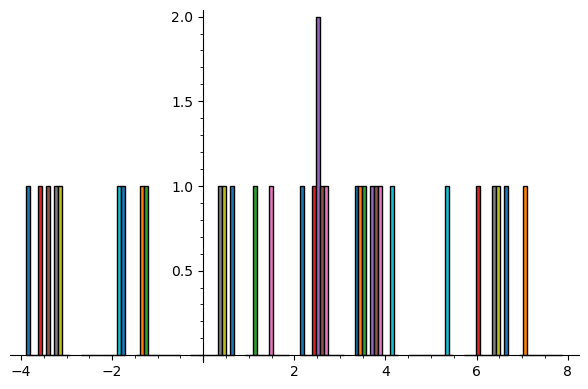

In [18]:
#======= This algorithm is used when q IS EXACTLY a power of 2, i.e, q=2^k ========
def sample_from_gadget_vector_power_of_2(q, u, n):
    """
    This algorithm is used when q IS EXACTLY a power of 2, i.e, q=2^k.
    It implements the second approach of Gaussian sampling in 
                [MP12, Section 4.1] for the case q=2^k
    * Input:
        - q: modulus which is q=2^k, k is positive integer. 
             Remember that the dimension k of gaget vector gg=(1, 2,..., 2^{k-1})
        - u: a coset, which is an integer in {0,...,q-1}
        - n: number of rows in         
                                         |gg  0   0  ...   0 |
                                         |0   gg  0  ...   0 |
                      Gadget matrix GG=  |0   0   gg ...   0 |    
                                         |...................|
                                         |0   0    0 ...   gg|
    * Output: a vector xx in ZZ^k s.t. <gg,xx>=u mod q, where gg=(1 2 4 ... 2^{k-1})
    """
    #Gausian parameter which is an optimal bound on the smoothing parameter of \Lambda^{perp}(GG) 
    sigma=2*sqrt(log(n,2))
    k=log(q,2)
    #
    list_of_vector_x=[]
    
    # sample z_i form D_{ZZ,s,0} and compute x_i=2z_i+u. Then, assign -z_i to u.
    for i in range(k):
        z_i=sample_z(s,0)
        x_i=2*z_i+u
        u=-z_i
        list_of_vector_x.append(x_i)
        
    # return x = vector(list_of_vector_x)
    return vector(list_of_vector_x)    


#=======================================================
# A TEST CASE
q=8
n=10
k=log(8,2)
print("q=",q)
print("k=",k)

gg=gadget_vector(k)
print("gg=", gg) 
u=randint(0,q-1)
print("u=",u)
xx=sample_from_gadget_vector_power_of_2(q, u, n)
print("xx=", xx) 

print("gg*xx mod", q, "=", gg*xx%q)    
histogram([sample_from_gadget_vector_power_of_2(q,u, n) for _ in range(11)])

In [19]:
def basis_of_gadget_vector(q):
    """
    This algorithm is to generate the basis for the q-ary lattice Lambda_q^{perp}(gg),
    where gg=[1 2 4 ... 2^{k-1}] is the gadget vector. 
    
    * Input:
        - q: modulus
    * Output:
        - basis SS_k for the q-ary lattice Lambda_q^{perp}(gg) w.r.t 
          the gadget vector gg=[1 2 4 ... 2^{k-1}], with k=ceil(log_2(q))
    
    """
 
    # bit size of q
    k=ceil(log(q,2))
    
    # We compute the bit decomposition of q below.
    
    # However, this way is not correct as it will return something like this:
    # bits_of_q_1= ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1']
    # ===> BE CAREFUL!! 
    # q_bits_1=bin(q)[2:]
    # print("q_bits_1==bin(q)[2:]=",q_bits_1)
    # bits_of_q_1=[q_bits_1[i] for i in range(len(q_bits_1))]#q.bits()
    # print("bits_of_q_1=", bits_of_q_1)
    
    # We have to use the following way:
    bits_of_q=q.bits()
    #print("bits_of_q=", bits_of_q)
    
    # Initialize SS_k as a zero matrix in ZZ^{k x k}
    SSk=zero_matrix(ZZ, k, k)
    # print("SS_k=")
    # print(SSk)
    
    # For each column i
    for j in range(k-1):
        SSk[j,j]=2
        SSk[j+1,j]=-1
        
    # For the last column, i.e., j=k-1 
    # if q=2^k, we set the (k,k)-th element to be 2
    if q==2^k:
            SSk[k-1,k-1]=2
    # if q!=2^k , we change the last column by the list bits_of_q
    else:
        for i in range(k):
            SSk[i,k-1]=bits_of_q[i]
    # print("SS_k=")
    # print(SSk)
    
    return SSk
    
#=======================================================
# A TEST CASE

q=1025
print("k=log_2(q)=",ceil(log(q,2)))
bits_of_q=q.bits()
print("bits_of_q=", bits_of_q)
basis_of_gadget_vector(q)

k=log_2(q)= 11
bits_of_q= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


[ 2  0  0  0  0  0  0  0  0  0  1]
[-1  2  0  0  0  0  0  0  0  0  0]
[ 0 -1  2  0  0  0  0  0  0  0  0]
[ 0  0 -1  2  0  0  0  0  0  0  0]
[ 0  0  0 -1  2  0  0  0  0  0  0]
[ 0  0  0  0 -1  2  0  0  0  0  0]
[ 0  0  0  0  0 -1  2  0  0  0  0]
[ 0  0  0  0  0  0 -1  2  0  0  0]
[ 0  0  0  0  0  0  0 -1  2  0  0]
[ 0  0  0  0  0  0  0  0 -1  2  0]
[ 0  0  0  0  0  0  0  0  0 -1  1]

In [20]:

def basis_of_gadget_matrix(n,q):
    """
    This algorithm is to generate the basis for the q-ary lattice Lambda_q^{perp}(GG), where
                           |gg  0   0  ...   0 |
                           |0   gg  0  ...   0 |
                      GG=  |0   0   gg ...   0 |    
                           |...................|
                           |0   0    0 ...   gg|,
     where gg=[1 2 4 ... 2^{k-1}] is the gadget vector. 
     
    * Input:
        - n: number of rows of the gadget matrix GG
        - q: modulus
    * Output:
        - basis SS for the q-ary lattice Lambda_q^{perp}(GG).
    """
     
    # Conpute a basis SSk for the q-ary lattice Lambda_q^{perp}(gg), 
    # where the gadget vector gg=[1 2 4 ... 2^{k-1}]
    SSk=basis_of_gadget_vector(q)
    IIn=identity_matrix(ZZ,n)
    
    # SS is the tensor product of IIn with SSk
    SS=IIn.tensor_product(SSk)
    return SS
    
#=======================================================
# A TEST CASE

q=11
n=4
SS=basis_of_gadget_matrix(n,q)
print("SS=")
print(SS)

SS=
[ 2  0  0  1| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[-1  2  0  1| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[ 0 -1  2  0| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[ 0  0 -1  1| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[-----------+-----------+-----------+-----------]
[ 0  0  0  0| 2  0  0  1| 0  0  0  0| 0  0  0  0]
[ 0  0  0  0|-1  2  0  1| 0  0  0  0| 0  0  0  0]
[ 0  0  0  0| 0 -1  2  0| 0  0  0  0| 0  0  0  0]
[ 0  0  0  0| 0  0 -1  1| 0  0  0  0| 0  0  0  0]
[-----------+-----------+-----------+-----------]
[ 0  0  0  0| 0  0  0  0| 2  0  0  1| 0  0  0  0]
[ 0  0  0  0| 0  0  0  0|-1  2  0  1| 0  0  0  0]
[ 0  0  0  0| 0  0  0  0| 0 -1  2  0| 0  0  0  0]
[ 0  0  0  0| 0  0  0  0| 0  0 -1  1| 0  0  0  0]
[-----------+-----------+-----------+-----------]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0| 2  0  0  1]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0|-1  2  0  1]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0| 0 -1  2  0]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0| 0  0 -1  1]


In [21]:
def sample_d_mp12(TT,AA,HH,uu, q, epsilon=2^(-84)):
    """
    This algorithm is to sample vector from discrete Gaussian over q-ary lattice Lambda^{uu}^{perp}(AA);
    * Input:
        - TT: An (mt x w)-matrix trapdoor for matrix AA (TT is exactly RR in [MP12]) in ZZq.
          Here w=n*k, where k=ceil(log_2(q))
        - AA: A random (n x m)-matrix in ZZq. 
          Note that AA is not AAbar in Algorihtm 3 of MP12.
        - HH: An invertible (n x n)-matrix in ZZ_q (it is called the tag w.r.t AA, TT).
          However, we compute inverse of HH in ZZ instead of in ZZ_q. 
          If HH=zero_matrix then the algorithm will be stopped.
        - uu: An n-vector in ZZq
        - q: A modulus for the ring ZZq we are working in
        - epsilon: For smoothing parameter. By default, we set epsilon=2^(-84)
    * Output: 
        - A (pseudo-random) vector xx in the q-ary lattice Lambda_{uu}^{perp}(AA) 
          sampled from D_{Lambda_{uu^{perp}(AA)}
    """
    # Check if HH is invertible
    if HH.is_invertible()==False:
        print("The algorithm does not work in this case. Please choose the tag matrix to be invertible.")
        return ValueError
    # Dimensions, sizes 
    n=AA.nrows()
    #print("n=", n)
    m=AA.ncols()
    mt=TT.nrows()   
    #print("mt=", mt)
    w=TT.ncols()         # Note that, m=mt+w
    #print("w=", w)
    
    k=ceil(log(q,2))
    
    
    ZZq = IntegerModRing(q)
 
    # operator norm of TT
    s1_TT=operator_norm(TT)
    
    # Gaussian parameters
    r=smoothing_parameter_of_ZZ(epsilon) # Here we choose r= smoothing parameter of ZZ (i.e., s=\eta_{epsilon}(ZZ))
                                         # (See GPV08, at the beginning of Section 2)
    sigma_GG = 5                 # sigma_GG: Gaussian parameter used to sample over the q-ary 
                                 # lattice Lambda_q^{perp}(GG). 
                                 # Via [MP12, Algorithm 3], sqrt(sigma_GG)>=2 or sigma_GG=sqrt(5). 
    sigma = 7*(s1_TT^2+1)
    #sqrt_sigma=sqrt(sigma)
    sigma_pp = 2*(s1_TT^2+1)
    r_GG=r*sqrt(sigma_GG)
    r_pp = r*sqrt(sigma_pp)
  
    # Generate gadget matrix GG
    GG=gadget_matrix(n, q)
    #GGz=GG.change_ring(ZZ)
    #print("GG=")
    #print(GG)
    #print("GG.nrows=", GG.nrows())
    #print("GG.ncols=", GG.ncols())
    
    # Change ring for uu
    uuz=uu.change_ring(ZZ)  # We have to change ring. Otherwise, it will get an error notification.
    #print("uuz=",uuz)
     
    
    #Compute [TT^t I] 
    IIw=identity_matrix(ZZ,w)
    KK=(TT.transpose()).augment(IIw)
    #print("KK=")
    #print(KK)
        
    # Stack of TT over IIw, i.e., matrix [TT^t|IIw]^t
    TT_over_IIw=TT.stack(IIw)
    
    # Choose pp from D_{ZZ^m,r_pp}====
    cc=zero_vector(ZZ,m)        # center vector
    pp=sample_d(ZZ^m,r_pp,cc)
    # print("pp=", pp)
    pp1=vector([pp[i] for i in range(mt)])
    pp2=vector([pp[i] for i in [mt..m-1]])
    # print("pp1=", pp1)
    # print("pp2", pp2)
    
    #print("len(pp)=",len(pp))
    #print("len(pp1)=",len(pp1))
    #print("len(pp2)=",len(pp2))
    # Take matrix AA bar from matrix AA
    AAt=AA[[0..n-1],[0..mt-1]]
    AAtz= AAt.change_ring(ZZ)
    # print("AAt=");print(AAt)
   
    # vector ww bar in MP12
    wwt=(AAtz*(pp1-TT*pp2))%q
    ww=(GG*pp2)%q
    # wwtz=wwt.change_ring(ZZ)
    # wwz=ww.change_ring(ZZ)
    #print("wwtz=",wwt)
    #print("wwz=",ww)
    
    #Compute inverse of the tag HH
    HH_inv=HH.inverse() # If we generate HH_inv <----modulo_inverse_matrix(HH, q) it will be false
    #print("HH_inv=")
    #print (HH_inv)
    HH_invz=HH_inv.change_ring(ZZ)
    vv=(HH_invz*(uuz-wwt)-ww)%q 
    #print("len(vv)=",len(vv))
    # vv=vv.change_ring(ZZq)
    #print("vv=",vv)
    
    # Find a vector tt in ZZ^{w} such that GGz*tt=vvz. 
    # We can easily see that tt=bit_decomposition of vvz, computed as follows:
    # (i) each element of vvz (which is in ZZq) will have at most k=ceil(log(q,2)) bits.
    # (ii) if any element does not have enough k bits, then we append zeros to get k bits. 
    bit_decomp_of_vv=[]
 
    for i in range(len(vv)):
        list_of_bits=vv[i].bits()
        while len(list_of_bits)<k:
            list_of_bits.append(0)
        # print("vv[i].bits()=",list_of_bits)
        for j in range(k):
            bit_decomp_of_vv.append(list_of_bits[j])
    # print("bit_decomp_of_vv=",bit_decomp_of_vv) 
    tt=vector(bit_decomp_of_vv)
    #print("tt=",tt)
    #print("len(tt)=",len(tt))
    # print(vv==GG*tt) #to check if GG*tt=vv
    
    # Basis SS for q-ary lattice w.r.t GG
    SS=basis_of_gadget_matrix(n,q)
    #print("SS=")
    #print(SS)
    #print("SS.nrows()=",SS.nrows())
    #print("SS.ncols()=",SS.ncols())
    
    # EE=GGz*SS%q
    # print("EE=")
    # print(EE)
    
    # Choose zz from Lamda_vv^{\perp}(GG) using Discrete Gaussian of parameter r*sqrt(sigma_GG)
    yy=sample_d(SS.transpose(), r_GG, -tt) # Note that, we input SS.transpose() instead of SS
    #print("yy=")
    #print(yy)
    
    #print("GG*yy=", (GG*yy)%q)
    
    zz=yy+tt
    #print("zz=")
    #print(zz)
    
    # Lattice vector that is sampled from D_{Lambda_{uu^{perp}(AA)} will be:
    xx= pp+TT_over_IIw*zz
    
    #print("AA*xx=", (AA*xx)%q)
    #print(AA*xx==uu)
    return xx


#=======================================================
# A TEST CASE
n=5
q=13
mt=2
option_HH=3

epsilon=2^(-84)

(AA,HH,TT, q)=gen_trap_mp12(n,q,mt, option_HH, epsilon)

ZZq = IntegerModRing(q)
uu=random_vector(ZZq,n)
print("uu=", uu)

xx=sample_d_mp12(TT,AA,HH,uu,q, epsilon)   

print("xx=",xx)
print(AA*xx==uu)    

s= 4.33059187790484
uu= (4, 10, 0, 2, 7)
xx= (-50, 120, 71, 4, 119, 119, -283, 39, -81, 15, -113, -169, 58, -61, -49, -153, -152, -123, -310, -17, 52, -107)
True


In [22]:
def del_trap_mp12(AA, HH, TT, AA_1, HH_new, q, epsilon=2^(-84)):
    """
    See Algorithm 4 in MP12.
    * Input:
        - AA: A (n x m)-dimensional matrix 
        - AA_1: A (n x n*k)-dimensional matrix
        - HH: tag matrix for AA
        - TT: GG-trapdoor for AA
        - HH_new: An invertible matrix of dimension (m+n*k)x(m+n*k)
        - q: A modulus 
        - epsilon: To control the smoothing parameter
          By defaul we choose 2^(-84)
    * Output:
        - Output the MP12 trapdoor TT_new for AA_new=[AA|AA_1]
    """
    # Check if HH is invertible
    if HH_new.is_invertible()==False:
        print("The algorithm does not work in this case. Please choose the tag matrix to be invertible.")
        return ValueError
    
    # Dimensions, sizes 
    n=AA.nrows()
    #print("n=", n)
    m=AA.ncols()   
    #print("m=", m)
    mt=TT.nrows()   
    #print("mt=", mt)
    w=TT.ncols()         # Note that, m=mt+w
    #print("w=", w)   
    k=ceil(log(q,2))
    
    #print("k=",k)
    
    #print("AA.nrows()=",AA.nrows())
    #print("AA.ncols()=",AA.ncols())
    
    #print("TT.nrows()=",TT.nrows())
    #print("TT.ncols()=",TT.ncols())
    
    #print("AA_1.nrows()=",AA_1.nrows())
    #print("AA_1.ncols()=",AA_1.ncols())
    
    # Generate gadget matrix GG
    GG=gadget_matrix(n, q)
    
    # Gaussian parameter:
    # We do not need this one, since via sample_d_mp12, the Gaussian parameter only depends on
    # the operator norm s_1(TT) which can be computed inside sample_d_mp12
    #s_new=smoothing_parameter_q_ary_lattice(AA,q,epsilon)
    #print("s_new=",s_new)
    
    #print("AA=")
    #print(AA)
    
    # Compute matrix UU=HH_new*GG-AA_1
    UU=HH_new*GG-AA_1
    UU_in_column_form=UU.transpose()
    #print("UU=")
    #print(UU)
    #print("UU_in_column_form=")
    #print(UU_in_column_form)
    #print("UU.nrows()=",UU.nrows())
    #print("UU.ncols()=",UU.ncols())
    
    # Using sample_d_mp12 to generate tt_new for each column of UU
    TT_new_transpose=zero_matrix(ZZ,w, m)
    
    #print("TT_new_transpose=")
    #print(TT_new_transpose)
 
    #list_to_matrix=[]
    for i in range(w):
        tt_new=sample_d_mp12(TT,AA,HH,UU_in_column_form[i],q, epsilon)
        #print("tt_new=")
        #print(tt_new)
        #print(AA*tt_new==UU_in_column_form[i])
        TT_new_transpose[i]=tt_new
        
        #print(AA*tt_new==UU_in_column_form[i]%q)
        #list_to_matrix.append(tt_new)
        
    #TT_new=(Matrix(list_to_matrix)).transpose() # It is a column matrix
    
    TT_new=TT_new_transpose.transpose()
    #print("TT_new=")
    #print(TT_new.str())
    
    # To check
    #print("AA*TT_new=UU?",AA*TT_new==UU)
    #print("TT_new.nrows()=",TT_new.nrows())
    #print("TT_new.ncols()=",TT_new.ncols())
    
    return TT_new

#=================================================================
# A TEST CASE

n=5
q=13
mt=2
option_HH=3
k=ceil(log(q,2))
w=n*k
print("k=",k)
print("w=",w)
print("m=",mt+n*k)

epsilon=2^(-84)
(AA,HH,TT, q)=gen_trap_mp12(n,q,mt, option_HH, epsilon)

AA_1=random_matrix(ZZq,n, w)

HH_new= random_invertible_matrix(q, n)

ZZq = IntegerModRing(q)
print("uu=", uu)

TT_new=del_trap_mp12(AA, HH, TT, AA_1, HH_new, q, epsilon)

print("TT_new=")
print(TT_new)
print(type(TT_new))

k= 4
w= 20
m= 22
s= 4.33059187790484
uu= (4, 10, 0, 2, 7)
TT_new=
[  71  -10  -23  735   33   76 -432  166   52  143  -48  -19   94  354  -74  154   75  131   60   99]
[-109  -56   -9 -112  351   79  107  188  -31 -148  -70 -544  262 -414 -225  220   53 -103  220  306]
[ -36   25 -125   27  -78  136  -59  277  141    9  189  -51  -38  236   15   77 -332  147 -100  171]
[ -27   94  131 -143   19   56 -125  -48  -31  -44  161   20  -21   -2  291   51  160  115 -122  205]
[-270 -161   18  -17  -62 -156  333  133  -73  -99  297 -250  142  108   97 -112  -47   18 -250 -121]
[  -9 -106  171    0 -117   74 -194  -96  -13 -317  -26  -87  -71  -38   -3 -137   25  -61 -168  119]
[  23   71  134   56   95  -15  -32  167   34  160   26   27 -120 -243 -169  -20  214 -154 -123 -136]
[ 109   35    7  108  -94   59 -236  -77   60 -102  -27  101  -45  385 -155 -140 -117   21   38  230]
[   1 -156  239  -80   -1  -81 -135  -43  151 -102  116 -181  -67 -275  138 -176   32  205  105  -40]
[ 125  -87   42 

In [23]:
# import hashlib 
import sys
import hashlib

def hash_to_a_matrix(string,n,m,q):
    """
    Hash function h: {0,1}^* |---->  ZZ_q^{n x m} 
    that maps a bit string of abitrary length to a random matrix in ZZ_q^{n x m}.
    The idea is as follows:
    -  On input "string", we use SHAKE-256 to generate a binary string bin_str of M=n*m*ceil(log_2(q)) bits.
     Note that, in hexdigest(par), we choose par=ceil (M/8).
    -  We use ceil(log_2(q)) bits to convert an integer in ZZ_q
    * Input:
        - string: A string
        - q: modulus
        - n, m: Integers define the dimesions of output matrices.
    * Output:
        - a random matrix in ZZ_q^{n x m}
    """
    # 
    ZZq=IntegerModRing(q)
    k=ceil(log(q,2))
    
    AA=Matrix(ZZq,n, m)
    s = hashlib.shake_256()
    s.update(string.encode())
    
    # Compute the input for hexdigest(). With input t, it outputs about t*8 bits.
    # We will use k (here k=ceil(log(q,2))) bits to get an integer in ZZ_q, 
    #then we need n*m*k bits for ZZ_q^{n x m}
    t=ceil(n*m*k/8)
    #print("t=",t)
    hex_string=s.hexdigest(int(t+1)) # We put t+1 to make sure the sufficient number of output bits  
    a=Integer(hex_string, base=16)      
    
    # binary string of the integer a
    a_bits=bin(a)[2:]     # We don't care the prefix "0b" 
    #print("len(a_bits)=", len(a_bits))
    #print("a_bits=",a_bits)
    
    for i in range(n):
        #cut a_bits into n intervals, each of which having size m
        str_i=a_bits[i*m*k:(i+1)*m*k]
        #print("len(str_", i, ")=", len(str_i))
        #print("str[",i,"j=", str_i)
        for j in range(m):
            #cut str_i into n*k intervals, each of which having size of k=ceil(log_2(q))
            aa_ij=str_i[j*k:(j+1)*k]
            #print("aa_ij=",aa_ij)
            
            #Convert into the (i,j)-the element of AA
            AA[i,j]=int(aa_ij,base=2)
            #print("AA[",i, ",",j,"]=",AA[i,j])
            
    #print("AA=")
    #print(AA)
    
    return AA

#====================
# A TEST CASE
n=10
q=26 #next_prime(2^3)
ZZq=IntegerModRing(q)
m=16
#k=ceil(log(q,2))
string="hello, how are you today?"
print("q=",q)
print("n=",n)
print("m=",m)
hash_to_a_matrix(string,n,m,q)

q= 26
n= 10
m= 16


[25 12 17  3  4 12  3 25  1  2 18  1 24 19 19  0]
[ 1  2  3 13  1 16 10 21  5  6  3 17 21  0  5  2]
[19 16  0 16 13  4  7  0  3 20 20  1 18 10 17  2]
[18 18 15 20  5  3 19 17 22  3 11  2  9 18  6  5]
[13 25 17 15  6  3  7  5 22  2  8  3 21 11  7  7]
[ 3  8  9  8 13 21 14  5  2 21 13 23 21 23 24  5]
[14 11  5 25 15 18 14  0 16  5  4  9  0  1  5  6]
[ 3 20  4  8  5 13 16 17 15  8  0  5 25  1  0 24]
[ 2 15  2 18  2  4 10  3  4 19  1  1 24  5  3 18]
[24  4  8  4  7 23 23 16  4  2 19 10  8 25  3 15]

In [24]:
import hashlib
import random
def hash_to_a_ball(string,n,w):
    """
    This is the hash function h_2: {0,1}^* |---->  S^n_w
    that maps a bit string of abitrary length to a random sparse vector in S^n_w.
    Here S^n_w:{cc in {0,1}^n: ||cc||_1=w}.
    
    The idea is as follows:
    - Exploit the idea of SampleInBall of Dilithium 
    (see at https://pq-crystals.org/dilithium/index.shtml)
    - 
    * Input:
        - string: A string
        - n: length of output binary vectors
        - w: the number of bit 1 in the output vector.
    
    * Output:
        - a random vector in S^n_w
    """
    # Hash the input string using SHAKE-256 to get a 256-bit output
    a_t = hashlib.shake_256()
    a_t.update(string.encode())
    a=Integer(a_t.hexdigest(int(w+10)), base=16)      # w+1 bytes to have an integer of (w+10)*8 bits 
    
    # binary string of the integer a
    a_bits=bin(a)
    #print("len(a_bits)=", len(a_bits))
    #print("a_bits=",a_bits)
    
    # From now on, we impplement SampleinBall of Dilithium
    cc=[0 for i in range(n)]
    #print("cc=",cc)
    
    pos=7 # We start by using the first 8 bits of aa
    count=0
    
    for i in range(n-w,n):
        #print("i=",i)
        j=i+1           # set j >i
        while (j>i):
            #count=count+1
            
            # To check the length of the last block of bits in the current bit string.
            # If the length <8, we have to call SHAKE-256 again to get a longer bit string
            
            #print("len(a_bits[pos+1:pos+9])=", len(a_bits[pos+1:pos+9]))
            if(len(a_bits[pos+1:pos+9])<8 ):
                #print("Create a new bit string with count=", count)
                a=Integer(a_t.hexdigest(int(w+10+count)), base=16)          # (w+10+count) bytes
                a_bits=bin(a)
                #print("len(a_bits)=", len(a_bits))
                #print("a_bits=",a_bits)
                #pos=255+(count-1)*8
                
            # Compute new j that belongs to {1, ..., i}
            #==========================================
            
            # 8 bits in [pos+1, pos+9)
            j_bits=a_bits[pos+1:pos+9]   
            #print("j_bits=",j_bits)
            j=Integer(j_bits, base=2)
            
            # Count the muber of repeating the While loop due to j>i
            if (j>i):
                #print("We have (j>i), j=",j)
                count=count+1
                #print("count=", count)
        
            # Move to the next byte
            pos=pos+8
            #print("pos in while loop =",pos)
        
        
        #print("We have (j<=i), j=",j)
        #print("pos out while loop=",pos)
        #print("cc[j]=",cc[j])
        cc[i]=cc[j]
        #print("cc[i]=",cc[i])
        cc[j]=1
        #print("cc_new[j]=",cc[j])
        #print("=======================================")
    
    #print("cc=",cc)
    return vector(cc)

#====================
# A TEST CASE
n=100
w=48
#string="hello, today is very nice to relax"
AA=random_matrix(ZZ,n, n+w)
hi="hi how ae you????"
list_q=["a", "b", "c", "d"]
BB=AA
string_1=str(AA)+hi+ str(list_q)

string_2=str(BB) +hi+ str(list_q)
#print("string=",string)
print("n=",n)
print("w=",w)


ww=hash_to_a_ball(string_1,n,w)
print("The corresponding vector:")
print("ww=",ww)
print("len(ww)=", len(ww))


n= 100
w= 48
The corresponding vector:
ww= (0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0)
len(ww)= 100


In [25]:
def idlrs_parameter_setup():
    
    print("Please enter the security_parameter n=: \n")
    n=int(input())
    #print("We have n=secuirty_parameter=\n", n)

    print("Please enter a modulus q>=2:\n")
    q=int(input())
    M=3
    k=ceil(log(q,2))
    print("Please enter mt>=1:\n")
    mt= int(input())
    
    m=mt+n*k
    print("We have m=mt+n*k=",m)
    
    print("Please enter w>=3:\n")
    w= int(input())
    
    print("Please enter epsilon_power (for the smoothing parameter and Gaussian parameters)")
    print("then we can compute epsilon=2^(-epsilon_power)")
    print("We should choose epsilon_power>=84:\n")
    epsilon_power= int(input())
    epsilon=RR(2^(-epsilon_power))
    
    # Gaussian parameter for gen_trap_mp12
    sigma_1=smoothing_parameter_of_ZZ(epsilon)
    
    # Gaussian parameter for del_trap_mp12
    s_1_TT=RR(sigma_1*(1/sqrt(2*pi))*(sqrt(mt)+sqrt(n*k)))
    sigma_2=RR(sqrt(5)*(s_1_TT+1)*(sqrt(log(n,2))))
    
    # Gaussian parameter for sample_d_mp12
    s_1_TT_id=RR(sigma_2*(1/sqrt(2*pi))*(sqrt(m)+sqrt(n*k)))
    sigma_3=RR(sqrt(7*(s_1_TT_id^2+1)))
    
     # Gaussian parameter for rejection sampling
    sigma=RR(12*sigma_3*sqrt(m+n*k)*w*sqrt(log(m+n*k+n,2)))
    
    public_parameters=(n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)
    #print("public_parameters=(n,q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=", public_parameters)
    return public_parameters

#============================================
# A TEST CASE


public_parameters=idlrs_parameter_setup()
print("public_parameters=(n,q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=", public_parameters)

Please enter the security_parameter n=: 



 10


Please enter a modulus q>=2:



 13


Please enter mt>=1:



 3


We have m=mt+n*k= 43
Please enter w>=3:



 5


Please enter epsilon_power (for the smoothing parameter and Gaussian parameters)
then we can compute epsilon=2^(-epsilon_power)
We should choose epsilon_power=84:



 90


public_parameters=(n,q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)= (10, 13, 5, 3, 43, 3, 4.48083023712027, 62.7704517876768, 853.492117070353, 1.19302832066351e6)


In [26]:
def idlrs_keygen(public_parameters, option_HH=1):
    """
    This algorithm is to generate public key and secret key for the scheme
    * Input:
        - public_parameters: public parameters that was generated by the algorithm 
          parameter_setup(secuirty_parameter). Note that, public_parameters=(n, q, w, M, m, mt).
        - option_HH: option to generate the tag matrix HH. 
            + If option_HH=0: HH= zero matrix
            + If option_HH=1: HH is chosen to be the identity matrix II
            + Otherwise: HH will be randomly invertible matrix
    
    * Output:
        - A key pair (public_key, secret_key)
    """
    (n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=public_parameters
    #option_HH=1            # HH is chosen to be the identity matrix II
    epsilon=2^(-84)        # for Gaussian paramater
    (AA, HH, TT, q)=gen_trap_mp12(n, q, mt, option_HH, epsilon)
    master_public_key=AA
    master_secret_key=TT
    print("master_public_key=")
    print(master_public_key)
    print("master_secret_key=")
    print(master_secret_key)
    tag_matrix=HH
    print("tag matrix HH=")
    print(tag_matrix)
    keys=(master_public_key, master_secret_key, tag_matrix)
    return keys

#=====================================================
# A TEST CASE
keys=idlrs_keygen(public_parameters)
(master_public_key, master_secret_key, tag_matrix)=keys
print(keys)

s= 4.33059187790484
master_public_key=
[ 0  9 12| 3  5  6  7  7 12  6  6 11 12  0  0  8  4  3  7 12  5  9  3  4  9  1  2  7 10  3  2  9  8 10  4  7  1  8  9  7  6  3 10]
[10  8  2| 5  4 10  2  7  1  3  1  4  8  6 10 11  7  7  6  1 10  8  2  3  3  6  1  2 12  7 12 10  7 12  4 12  4 11  6  3  8  6  9]
[ 6 11  3| 6 12  0 11  9  6  9  0  1  9  7 12 12  7  3  1  8  5 10  1  9  8  0  9 11  0  4  1  4  7  8  4  3  4  5  4 11 10  3  1]
[12 10  0| 2  5  7 11  0  3 12 12  8 11  8  6  7 11  1 10  0  9  7  7  7  4 12  3 11 11  0  1  6  9  9  7  7  7 11 11  0  7  8  8]
[ 6 11  2| 5  7  9  4  9  4  1 11  9  7  8 12 11 10 10  7  9  6  5 12 10  8  3  2  9 11  7  3  3  6  0  4  5  7  6  9  1  4  5  6]
[ 8  4  2| 1 10  8  8  9 11  3  0  6 11  5  0 12  5  3  3  8 12  0  3 10  2  9  4  0  2  7  1  4  1  8  3  4  6 10  0  1  3  2  3]
[ 5 10  2|12  8  0 12 12  0  6  6  3 12 12  9  6 12  9  2  2 10 12 11  9  1  3  7 10  5 11 12  4  4  0  9  3  2  7  5 12  5  6  5]
[ 1 12  4| 5 10  2 10  7  6  8  4 10  1  6  

In [27]:
def public_key_for_each_identity(public_parameters, master_public_key, identity):
    """
    """
    (n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=public_parameters
    q=Integer(q)
    k=ceil(log(q,2))
    
    print("m+n*k+n=",m+n*k+n)
    #print("#bit of q, k=log_2(q)=",k)
    
    #print("(n, q, w, M, m, mt,k)=",(n, q, w, M, m, mt,k))
    
    ZZq=IntegerModRing(q)
    
    #print(type(q))
    
    AA=master_public_key
    #print("AA=")
    #print(AA)
    
    QQ_id=hash_to_a_matrix(identity,n,n*k,q)
    #print("QQ_id=")
    #print(QQ_id)
    #print("QQ_id.nrows()=",QQ_id.nrows())
    #print("QQ_id.cols()=",QQ_id.ncols())
    
    AA_id=AA.augment(QQ_id)
    #print("AA_id=")
    #print(AA_id)
    print("AA_id.nrows()=",AA_id.nrows())
    print("AA_id.cols()=",AA_id.ncols())
    
    return AA_id

#===========================
# A TEST CASE

identity="huyle84@gmail.com"
AA_id=public_key_for_each_identity(public_parameters, master_public_key, identity)
print("AA_id=",AA_id)


m+n*k+n= 93
AA_id.nrows()= 10
AA_id.cols()= 83
AA_id= [ 0  9 12  3  5  6  7  7 12  6  6 11 12  0  0  8  4  3  7 12  5  9  3  4  9  1  2  7 10  3  2  9  8 10  4  7  1  8  9  7  6  3 10  8  1  0  6  3  6  1  9 11  1  1  8  1  3  9  4  9 11  8 11  0  4 10  6  0  1  4  5  2  1  9  7  1  9  7 11  4  8 12  0]
[10  8  2  5  4 10  2  7  1  3  1  4  8  6 10 11  7  7  6  1 10  8  2  3  3  6  1  2 12  7 12 10  7 12  4 12  4 11  6  3  8  6  9  1  6  3 11  5  2  6  4 10 10  8  4  0  2  3  4  1  2  0  4 11  1  4  7  2  7  9 10  0  6  8  2  1  5  0  1 11  8 12  4]
[ 6 11  3  6 12  0 11  9  6  9  0  1  9  7 12 12  7  3  1  8  5 10  1  9  8  0  9 11  0  4  1  4  7  8  4  3  4  5  4 11 10  3  1  2  0  9  0  4  0 11 10  2  1  6  6  0  5 12  0  1 12  1  1  4  5 12  4  5 10  5  1  2  6  7  4 12  5  7  0  4  4 10 12]
[12 10  0  2  5  7 11  0  3 12 12  8 11  8  6  7 11  1 10  0  9  7  7  7  4 12  3 11 11  0  1  6  9  9  7  7  7 11 11  0  7  8  8  1  9  2  4 11  7 10  4  6  3  6  0  2 10  4  1  9  1  2 10  2 

In [28]:
def idlrs_extract(public_parameters, keys, identity):
    """
    
    """
    
    epsilon=2^(-84) # For smoothing parameter in Gaussian distribution
    
    (n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=public_parameters
    q=Integer(q)
    k=ceil(log(q,2))
    print("#bit of q, k=log_2(q)=",k)
    
    print("(n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=",(n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma))
    
    ZZq=IntegerModRing(q)
    
    #print(type(q))
    
    #(master_public_key, master_secret_key, tag_matrix)=keys
    (AA,TT,HH)=keys
    
    #AA=master_public_key
    #print("AA=")
    #print(AA)
    #TT=master_secret_key
    #print("TT.nrows()=",TT.nrows())
    #print("TT.cols()=",TT.ncols())
    #HH=tag_matrix
    #print("HH=")
    #print(HH)
    #print("HH.nrows()=",HH.nrows())
    #print("HH.cols()=",HH.ncols())

    QQ_id=hash_to_a_matrix(identity,n,n*k,q)
    #print("QQ_id=")
    #print(QQ_id)
    #print("QQ_id.nrows()=",QQ_id.nrows())
    #print("QQ_id.cols()=",QQ_id.ncols())
    
    AA_id=AA.augment(QQ_id)
    #print("AA_id=")
    #print(AA_id)
    #print("AA_id.nrows()=",AA_id.nrows())
    #print("AA_id.cols()=",AA_id.ncols())
    
    #random_invertible_matrix(modulus=1, size=3)
    HH_id=HH # We set H_id to be HH instead of choosing randomly via random_invertible_matrix(q, n).
    #print("HH_id=")
    #print(HH_id)
    #print("HH_id.nrows()=",HH_id.nrows())
    #print("HH_id.cols()=",HH_id.ncols())
    
    #del_trap_mp12(AA, HH, TT, AA_1, HH_id, q, epsilon)
    TT_id=del_trap_mp12(AA,HH,TT, QQ_id, HH_id, q, epsilon)
    
    #print("TT_id.nrows()=",TT_id.nrows())
    #print("TT_id.cols()=",TT_id.ncols())
    
    SS_id_transpose=zero_matrix(ZZ, n, m+n*k)
    
    # matrix q*II_n
    qIIn=q*identity_matrix(ZZq,n)
    
    for i in range(n):
        #print("i=",i)
        #sample_d_mp12(TT,AA,HH,uu,q, epsilon)
        SS_id_transpose[i]=sample_d_mp12(TT_id,AA_id,HH_id,qIIn[i],q, epsilon)
        #print("ss_id=",SS_id_transpose[i])
        
    # Transpose to get SS_id in ZZ^{m+n*k x n}
    SS_id=SS_id_transpose.transpose()
    #private_key_id=SS_id
    #print("SS_id=")
    #print(SS_id)
    
    print("AA_id*SS_id=qIIn?",AA_id*SS_id==qIIn)
    
    keys_id=(AA_id,SS_id)
    
    return keys_id

#======================================
# A TEST CASE

identity="hduong@gmail.com"
(AA_s,SS_s)=idlrs_extract(public_parameters, keys, identity)

#print("AA_s=")
#print(AA_s)


#print("SS_s=")
#print(SS_s)


#bit of q, k=log_2(q)= 4
(n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)= (10, 13, 5, 3, 43, 3, 4.48083023712027, 62.7704517876768, 853.492117070353, 1.19302832066351e6)
AA_id*SS_id=qIIn? True


In [181]:
def idlrs_sign(public_parameters, message, event, ring_of_signers, real_signer):
    """
    
    * Input:
        - public_parameters: The set of public parameters. 
          Recall that (n, q, w, M, m, mt)=public_parameters
        - message: A message will be signed.
        - event: A event
        - ring_of_signers: A ring of signers:
        - real_signer: consists of the idenity and the private key of the real signer in the ring
    * Output:
        -
    """
    (n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=public_parameters
    #print("sigma_1=",sigma)
     
    k=ceil(log(q,2))
    print("m+n*k+n??=", m+n*k+n)
    
    ZZq=IntegerModRing(q)
    ZZ2q=IntegerModRing(2*q)
    
    (id_real_signer, private_key_of_real_signer)=real_signer
    
     # Number of signers in the ring
    l=len(ring_of_signers)
    
    print("l=",l)
    
    for i in range(l):
        if id_real_signer==ring_of_signers[i]:
            order_real_signer=i
    print("order_real_signer=",order_real_signer)
    
    
    SS_s=private_key_of_real_signer
    
    
    IIn=identity_matrix(ZZ,n)
    qqIIn=q*identity_matrix(ZZ,n)
    #hash_to_a_matrix(string,n,m,q)
    KK=hash_to_a_matrix(event,n, m+n*k, q)
    EE=KK*SS_s
    KK_hat=(2*KK).augment(-2*EE+qqIIn,subdivide=True)
    #print("KK_hat=")
    #print(KK_hat)
    
    SS_s_hat=SS_s.stack(IIn,subdivide=True)
    #print("SS_hat=")
    #print(SS_hat)
    
    #print("KK_hat*SS_hat=qqIIn??", KK_hat*SS_s_hat==qqIIn )
    
    AA_id_hat_list=[]
    OOn=zero_matrix(ZZ2q,n)
    for i in range(l):
        AA_i=public_key_for_each_identity(public_parameters, master_public_key, ring_of_signers[i])
        #print("AA_i=")
        #print(AA_i)
        AA_i_hat=AA_i.augment(OOn,subdivide=True)
        #print("AA_i_hat=")
        #print(AA_i_hat)
        AA_id_hat_list.append(AA_i_hat)
    
    AA_s_hat=AA_id_hat_list[order_real_signer]   # The public key of the real signer augmented by zero matrix
    #print("AA_s_hat=")
    #print(AA_s_hat)
    

    # center vector in Gaussian distribution
    cc=zero_vector(ZZ,m+n*k+n)
    
    count=0
    
    #print("begin rejection sampling")
    cc_list=[0]*l
    while True:
        count=count+1
        print("count=",count)
        print("inside rejection sampling")
        
        #string_list=[0]*l
        
    
        
        yy=sample_d(ZZ^(m+n*k+n),sigma,cc)  #sample_d(BB,s,cc)
        #print("yy=",yy)

        AA_s_hat_yy= AA_s_hat*yy
        KK_hat_yy=KK_hat*yy

        string_s=str(AA_s_hat_yy)+str(KK_hat_yy)+str(KK_hat)+str(ring_of_signers)+str(message)+str(event)+str(EE)
        #print("input_string=", input_string)

        #string_list[order_real_signer]= string_s
        
        cc_s_plus_1=hash_to_a_ball(string_s,n,w) #hash_to_a_ball(string,n,w)
        
        cc_list[(order_real_signer+1)%l]=cc_s_plus_1

        #print("cc_s_plus_1=", cc_s_plus_1)

        zz_list=[zero_vector(ZZ,m+n*k+n)]*l
        
        #print("zz_list=",zz_list)
        # From s+1 to l
        for i in range(order_real_signer+1,l):
            zz_i=sample_d(ZZ^(m+n*k+n),sigma,cc)  #sample_d(BB,sigma,cc)
            print("len(zz_i)=",len(zz_i))
            zz_list[i]=zz_i
            AA_i_hat_zz=AA_id_hat_list[i]*zz_i+q*cc_s_plus_1
            KK_hat_zz=KK_hat*zz_i+q*cc_s_plus_1
            
            str_i=str(AA_i_hat_zz)+str(KK_hat_zz)+str(KK_hat)+str(ring_of_signers)+str(message)+str(event)+str(EE)
            
            cc_s_plus_1=hash_to_a_ball(str_i,n,w)
            
            #string_list[i]=str_i
            
            cc_list[(i+1)%l]=cc_s_plus_1

        #print("zz_list_new", zz_list)

        # The output cc_s_plus_1 going out of the first for loop will be use in the second for loop.
        # It corresponds to cc_l in the paper
        for i in range(order_real_signer):
            zz_i=sample_d(ZZ^(m+n*k+n),sigma,cc)  #sample_d(BB,s,cc)
            #print("zz_i=",zz_i)
            zz_list[i]=zz_i
            AA_i_hat_zz=AA_id_hat_list[i]*zz_i+q*cc_s_plus_1
            KK_hat_zz=KK_hat*zz_i+q*cc_s_plus_1
            str_i=str(AA_i_hat_zz)+str(KK_hat_zz)+str(KK_hat)+str(ring_of_signers)+str(message)+str(event)+str(EE)
            cc_s_plus_1=hash_to_a_ball(str_i,n,w)
            
            #string_list[i]=str_i
            
            cc_list[(i+1)%l]=cc_s_plus_1
            
            # Save cc_1=H_2(AA_hat)
       
        #print("zz_list_new", zz_list)
        cc_1=cc_list[0]
        print("cc_1=",cc_1)
        cc_s=cc_s_plus_1   # Here we denote s=order_real_signer

        #Choose a random bit b<---{0,1}
        secure_random = random.SystemRandom()
        b=secure_random.choice([0,1])
        print("b=",b)

        
        xx=(-1)^b*SS_s_hat*cc_s
        zz_s=(xx+yy)%(2*q)
        
        #sigma_new=12*xx.norm()
        #M=exp(1+1/288)
        #print("alpha=", RR(alpha))
        #print("M=", RR(M))
        #print("sigma=",RR(sigma))
        #print("sigma_new=",RR(sigma_new))
        #if sigma_new >= sigma:
            #print("sigma_new >= sigma") 
        #u=uniform(0, 1)
        
        if count==5:
            break
        if gauss_function_vector(zz_s, cc, sigma)<=M*gauss_function_vector(zz_s, xx, sigma):
            break
    print("finish rejection sampling")
    print("count=",count)

    # After rejection sampling
    zz_list[order_real_signer]=zz_s
    
    signature=(ring_of_signers, zz_list, cc_1, EE,cc_list)
    return signature

#========================================
# A TEST CASE

id2="huyle84@gmail.com"
id1="hduong@gmail.com"
id3="thanh@kmail.com"
id0="theanh@hotmail.com"
id4="tuongnguyen@uow.edu.au"
ring_of_signers=[id0, id1, id2, id3, id4]
#print("ring_of_signers=",ring_of_signers)

real_signer=(id2, SS_s)
message="Someday I’ll live in the present again like I did when I was twelve."
message_2="Someday I will love you."
event="with the company XXXXXX"
(ring_of_signers, zz_list, cc_1, EE,cc_list)=idlrs_sign(public_parameters, message, event, ring_of_signers, real_signer)

#signature_1=idlrs_sign(public_parameters, message, event, ring_of_signers, real_signer)
#signature_2=idlrs_sign(public_parameters, message_2, event, ring_of_signers, real_signer)


#print("zz_list=")
#print(zz_list)
#print("cc_1=",cc_1)

#print("EE=")
#print(EE)
signature=(ring_of_signers, zz_list, cc_1, EE, cc_list, message, event)

m+n*k+n??= 460
l= 5
order_real_signer= 2
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
count= 1
inside rejection sampling
len(zz_i)= 460
len(zz_i)= 460
cc_1= (1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1)
b= 1
finish rejection sampling
count= 1


In [182]:
def idlrs_verify(public_parameters, signature):
    """
    """
    (n, q, w, M, m, mt, sigma_1, sigma_2, sigma_3, sigma)=public_parameters
    k=ceil(log(q,2))
    
    ZZq=IntegerModRing(q)
    ZZ2q=IntegerModRing(2*q)
    (ring_of_signers, zz_list, cc_1, EE, cc_list, message, event)=signature
    #print("signature=", signature)
    
    #event="today"
    
    
    # Step 1
    l=len(ring_of_signers)
    Lambda=1.3*sigma*sqrt(m+n*k+n)
    for i in range(l):
        if zz_list[i].norm()<=Lambda:
            print("zz_list[",i,"].norm()<Lambda")
        if zz_list[i].norm()>Lambda:
            print("zz_list[",i,"].norm()>Lambda")
            return 0
    
    # Step 2
    IIn=identity_matrix(ZZ,n)
    qqIIn=q*identity_matrix(ZZ,n)
    #hash_to_a_matrix(string,n,m,q)
    KK=hash_to_a_matrix(event,n, m+n*k, q)
    EE=KK*SS_s
    KK_hat=(2*KK).augment(-2*EE+qqIIn,subdivide=True)
    #print("KK_hat=")
    #print(KK_hat)
    
    OOn=zero_matrix(ZZ2q,n)
    # Step 3
    cc_i_plus_1=cc_1
    
    #string_list_new=[0]*l
    
    cc_list_new=[0]*l
    
    for i in range(l):
        AA_i=public_key_for_each_identity(public_parameters, master_public_key, ring_of_signers[i])
        
        print("AA_i.nrows()=", AA_i.nrows())
        
        AA_i_hat=AA_i.augment(OOn,subdivide=True)
        #print("AA_i_hat=")
        #print(AA_i_hat)
        #AA_id_hat_list.append(AA_i_hat)
        
        zz_i=zz_list[i]
        
        print("len(zz_i)=",len(zz_i))
        print("AA_i_hat.nrows()=",AA_i_hat.nrows())
        print("AA_i_hat.ncols()=",AA_i_hat.ncols())
        
        print("len(cc_i_plus_1)=",len(cc_i_plus_1))
        
        AA_i_hat_zz=AA_i_hat*zz_i+q*cc_i_plus_1
        
        
        KK_hat_zz=KK_hat*zz_i+q*cc_i_plus_1
        str_i=str(AA_i_hat_zz)+str(KK_hat_zz)+str(KK_hat)+str(ring_of_signers)+str(message)+str(event)+str(EE)
        cc_i_plus_1=hash_to_a_ball(str_i,n,w)
        
        cc_list_new[(i+1)%l]=cc_i_plus_1
        #string_list_new[i]=str_i
        #print("str_i=",str_i)
    print("cc_1=")
    print(cc_1)
    
    
    #print("string_list_new=string_list???", string_list_new==string_list)
    
    #for i in range(l):
        #print("string_list_new[",i, "]=string_list[",i,"]???", string_list_new[i]==string_list[i])
        
    for i in range(l):
        print("cc_list_new[",i, "]=cc_list[",i,"]???", cc_list_new[i]==cc_list[i])
    
    print("cc_i_plus_1=")
    print(cc_i_plus_1)
    if cc_1==cc_list_new[0]:
        return 1
    else: 
        print("invalid")
        return 0
#====================================================
# A TEST CASE

idlrs_verify(public_parameters, signature)

zz_list[ 0 ].norm()<Lambda
zz_list[ 1 ].norm()<Lambda
zz_list[ 2 ].norm()<Lambda
zz_list[ 3 ].norm()<Lambda
zz_list[ 4 ].norm()<Lambda
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
AA_i.nrows()= 30
len(zz_i)= 460
AA_i_hat.nrows()= 30
AA_i_hat.ncols()= 460
len(cc_i_plus_1)= 30
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
AA_i.nrows()= 30
len(zz_i)= 460
AA_i_hat.nrows()= 30
AA_i_hat.ncols()= 460
len(cc_i_plus_1)= 30
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
AA_i.nrows()= 30
len(zz_i)= 460
AA_i_hat.nrows()= 30
AA_i_hat.ncols()= 460
len(cc_i_plus_1)= 30
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
AA_i.nrows()= 30
len(zz_i)= 460
AA_i_hat.nrows()= 30
AA_i_hat.ncols()= 460
len(cc_i_plus_1)= 30
m+n*k+n= 460
AA_id.nrows()= 30
AA_id.cols()= 430
AA_i.nrows()= 30
len(zz_i)= 460
AA_i_hat.nrows()= 30
AA_i_hat.ncols()= 460
len(cc_i_plus_1)= 30
cc_1=
(1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1)
cc_list_new[ 0 ]=cc_list[ 0 ]??? False
cc_l

0

In [101]:
def idlrs_link(signature_1, signature_2):
    """
    """
    
    (message_1, event_1, ring_of_signers_1, zz_list_1, cc_1_1, EE_1, string_list_1, cc_list_1)=signature_1
    (message_2, event_2, ring_of_signers_2, zz_list_2, cc_1_2, EE_2, string_list_2, cc_list_2)=signature_2
    if EE_1==EE_2:
        print("Linked")
        return 1
    else:
        print("Unlinked")
        return 0

#======================================
# A TEST CASE

idlrs_link(signature_1, signature_2)

Linked


1

In [ ]:
def idlrs_get_private_key_size(SS):
    """
    """
    bit_size= 0
    
    n=SS.nrows()
    m.SSS.ncols()
    
    
    for i in range(n):
        for j in range(m):
        bit_size += int(SS[i,j]).bit_length()
    
    return int(int(bit_size)/8)

In [ ]:
def idlrs_get_signature_size(signature, n):
    bit_size= 0
    #extract sigma
    signature
    
    # de A
    ver_cl = ver_A[0:n]
    ver_ca = ver_A[n:2*n]
    ver_cb = ver_A[2*n:3*n]
    ver_cd = ver_A[3*n:4*n]
    ver_ce = ver_A[4*n:5*n]

    # Z
    ver_f = ver_Z[0:n]
    ver_za = ver_Z[n:2*n]
    ver_zb = ver_Z[2*n:3*n]
    ver_zd = ver_Z[-1]
    
    bit_size += int(ver_tau).bit_length()
    bit_size += int(ver_zd).bit_length()
    
    for i in range (0, n):
        bit_size += int(ver_cl[i]).bit_length()
        bit_size += int(ver_ca[i]).bit_length()
        bit_size += int(ver_cb[i]).bit_length()
        bit_size += int(ver_cd[i]).bit_length()
        bit_size += int(ver_ce[i]).bit_length()
        bit_size += int(ver_f[i]).bit_length()
        bit_size += int(ver_za[i]).bit_length()
        bit_size += int(ver_zb[i]).bit_length()
    
    return int(int(bit_size)/(8*1024))

In [ ]:
#======== MAIN===================

